## Sprint 4
## Team id : PNT2022TMID09252

### Import the necessary packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps

### Load data

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Data Analysis

In [5]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
X_train[60]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  53,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  84,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [7]:
y_train[60]

4

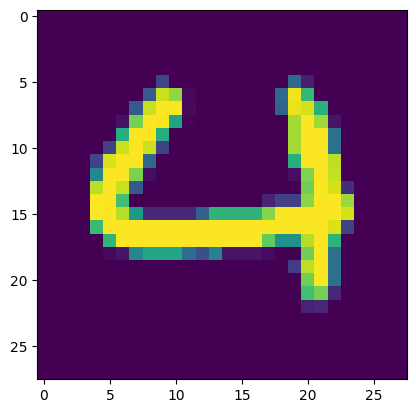

In [8]:
plt.imshow(X_train[60])

### Data Pre-Processing

In [9]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [10]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [11]:
Y_train[60]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

### Create model

In [12]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [13]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

### Train the model

In [14]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 107s 57ms/step - loss: 0.2587 - accuracy: 0.9495 - val_loss: 0.1014 - val_accuracy: 0.9711
Epoch 2/5
1875/1875 [==============================] - 99s 53ms/step - loss: 0.0759 - accuracy: 0.9768 - val_loss: 0.0723 - val_accuracy: 0.9799
Epoch 3/5
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0555 - accuracy: 0.9830 - val_loss: 0.0911 - val_accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0391 - accuracy: 0.9873 - val_loss: 0.0912 - val_accuracy: 0.9760
Epoch 5/5
1875/1875 [==============================] - 106s 57ms/step - loss: 0.0326 - accuracy: 0.9895 - val_loss: 0.1139 - val_accuracy: 0.9753


### Test the model

In [15]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.11387308686971664, 0.9753000140190125]


In [16]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 243ms/step
[[8.2286060e-11 8.1726578e-18 9.5722189e-12 4.7513780e-09 1.8010713e-17
  3.7692933e-18 8.6926084e-20 1.0000000e+00 1.7239443e-11 4.0386475e-12]
 [6.7005945e-12 2.2442040e-12 9.9999976e-01 1.5480001e-11 5.1354369e-16
  1.4405008e-21 9.2046122e-09 4.1000593e-14 2.2282470e-07 1.3286477e-20]
 [3.7303165e-09 9.9999595e-01 1.0630899e-06 6.3370566e-11 5.8244325e-08
  5.3153502e-11 1.5666743e-08 4.1363672e-09 2.8847007e-06 8.9976648e-13]
 [1.0000000e+00 1.4701150e-17 6.5042795e-13 9.5439226e-16 7.8821853e-16
  6.8370187e-15 9.6150046e-11 4.0510582e-17 5.5043851e-12 3.2619901e-10]]


In [18]:
print(np.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Save the model

In [19]:
model.save("model.h5")

### Test the saved model

In [20]:
model=load_model("model.h5")

In [22]:
img = Image.open("sample_img.png").convert("L")
img = img.resize((28, 28))
img2arr = np.array(img)
img2arr = img2arr.reshape(1, 28, 28, 1)
results  = model.predict(img2arr)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
print(results)

1/1 [==============================] - 0s 63ms/step
0    2
Name: Label, dtype: int64
